In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import filters, measure, morphology
import math
from skimage.measure import label, regionprops
from PIL import Image
import colorsys
from skimage import img_as_ubyte, exposure
from os import listdir
from os.path import isfile, join
import os
from qualityCheck import nucleiCheckTA, nucleiCheckTA1, nucleiCheckTANOQC

In [8]:
cytoPath = "/Volumes/My Passport/aorta/segmentations/cellSizeStitched/cellSize/P21/aorta01/predict"

nucBasePath = "/Volumes/My Passport/aorta/segmentations/cellSizeStitched/nuclei"
originalImageBase = "/Volumes/My Passport/aorta/segmentations/cellSizeStitched/cellSize/preprocessed"

nucleiImageBase = "/Volumes/My Passport/aorta/preprocessedImage/cellSize/nuclei"

In [9]:
cytoFolders = [x[0] for x in os.walk(cytoPath)]
cytoFolders = sorted(cytoFolders)


In [10]:
cytoFolders

['/Volumes/My Passport/aorta/segmentations/cellSizeStitched/cellSize/P21/aorta01/predict']

In [9]:
for cytoFolder in cytoFolders:
    os.chdir(cytoFolder)
    files = [f for f in listdir(cytoFolder) if isfile(join(cytoFolder, f)) if ".DS_Store" not in f if ".tif" in f if "._" not in f]
    aorta = cytoFolder.split("/")[-2]
    for file in files:
        aorta = cytoFolder.split("/")[-2]
        age = cytoFolder.split("/")[-3]
        #nucFile = file.split("_cellSize")[0] + "_" +  file.split("_cellSize")[1].split(".tif")[0] + "_cellSize_seg.npy"
        nucFile = file.split("_cellSize")[0] + "_nuclei" + file.split(".tif")[0].split("cellSize")[-1] + "_seg.npy"
        nucleiPath = join(nucBasePath, age, aorta, nucFile)
        cytoMasks = nucleiCheckTA(join(cytoFolder, file), nucleiPath, 3, 0.8)

        originalImage = cv2.imread(join(originalImageBase, age, aorta, file))
        #nucIm = file.split("_cellSize")[0] + "_" +  file.split("_cellSize")[1].split(".tif")[0] + "_cellSize.tif"
        nucIm = file.split("_cellSize")[0] + "_nuclei" + file.split(".tif")[0].split("cellSize")[-1] + ".tif"
        nucleiImage = cv2.imread(join(nucleiImageBase, age, aorta, nucIm))
        originalImage2 = originalImage + nucleiImage

        cellposeFile = {}
        zeros = np.zeros(originalImage.shape, dtype="uint8")

        dapi8bitNormalized= img_as_ubyte(exposure.rescale_intensity(originalImage2))
        cellSize8bitNormalized = img_as_ubyte(exposure.rescale_intensity(originalImage))
        dapi8bitNormalized = np.asarray(dapi8bitNormalized)
        dapi8bitNormalized = dapi8bitNormalized
        dapi8bitNormalized = dapi8bitNormalized.astype(cellSize8bitNormalized.dtype)
        merged8bitNormalized = cv2.merge([dapi8bitNormalized[:,:,0], cellSize8bitNormalized[:,:,0], cellSize8bitNormalized[:,:,0]])

        outlines = cv2.imread(join(cytoFolder, file))[:,:,0]
        #save in dic
        cellposeFile['masks'] = cytoMasks
        cellposeFile['img'] = merged8bitNormalized
        cellposeFile['outlines'] = outlines


        os.chdir(cytoFolder)
        os.chdir(os.path.normpath(os.getcwd() + os.sep + os.pardir))
        np.save(file.split(".tif")[0] + "_NEWseg.npy", cellposeFile)

In [11]:
#cell size cropped

for cytoFolder in cytoFolders:
    os.chdir(cytoFolder)
    files = [f for f in listdir(cytoFolder) if isfile(join(cytoFolder, f)) if ".DS_Store" not in f if ".tif" in f if "._" not in f]
    aorta = cytoFolder.split("/")[-2]
    for file in files:
        aorta = cytoFolder.split("/")[-2]
        age = cytoFolder.split("/")[-3]
        nucFile = file.split(".tif")[0] + "_seg.npy"
        nucleiPath = join(nucBasePath, age, aorta, nucFile)
        cytoMasks = nucleiCheckTANOQC(join(cytoFolder, file), nucleiPath, 3, 0.8)

        originalImage = cv2.imread(join(originalImageBase, age, aorta, file))
        nucIm = file
        nucleiImage = cv2.imread(join(nucleiImageBase, age, aorta, nucIm))
        originalImage2 = originalImage + nucleiImage

        cellposeFile = {}
        zeros = np.zeros(originalImage.shape, dtype="uint8")

        dapi8bitNormalized= img_as_ubyte(exposure.rescale_intensity(originalImage2))
        cellSize8bitNormalized = img_as_ubyte(exposure.rescale_intensity(originalImage))
        dapi8bitNormalized = np.asarray(dapi8bitNormalized)
        dapi8bitNormalized = dapi8bitNormalized
        dapi8bitNormalized = dapi8bitNormalized.astype(cellSize8bitNormalized.dtype)
        merged8bitNormalized = cv2.merge([dapi8bitNormalized[:,:,0], cellSize8bitNormalized[:,:,0], cellSize8bitNormalized[:,:,0]])

        outlines = cv2.imread(join(cytoFolder, file))[:,:,0]
        #save in dic
        cellposeFile['masks'] = cytoMasks
        cellposeFile['img'] = merged8bitNormalized
        cellposeFile['outlines'] = outlines


        os.chdir(cytoFolder)
        os.chdir(os.path.normpath(os.getcwd() + os.sep + os.pardir))
        np.save(file.split(".tif")[0] + "_seg.npy", cellposeFile)

In [30]:
#cell cycle EdUOnly
for cytoFolder in cytoFolders:
    os.chdir(cytoFolder)
    files = [f for f in listdir(cytoFolder) if isfile(join(cytoFolder, f)) if ".DS_Store" not in f if ".tif" in f if "._" not in f]
    aorta = cytoFolder.split("/")[-2]
    for file in files:
        aorta = cytoFolder.split("/")[-2]
        duration = cytoFolder.split("/")[-3]
        age = cytoFolder.split("/")[-4]
        #nucFile = file.split("_cellSize")[0] + "_nuclei" +  file.split("_cellSize")[1].split(".tif")[0] + "_seg.npy"
        nucFile = "cellCycleEdUOnlyImage_" + age + "_" + duration + "_" + aorta + "_nuclei" +  file.split("_cellSize")[1].split(".tif")[0] + "_seg.npy"
        nucleiPath = join(nucBasePath, age, duration, aorta, nucFile)
        cytoMasks = nucleiCheckTA(join(cytoFolder, file), nucleiPath, 0, 0.8)

        origFile = "cellSizeEdUOnlyImage_" + age + "_" + duration + "_" + aorta + "_" + file.split("_")[-1]
        originalImage = cv2.imread(join(originalImageBase, age, duration, aorta, origFile))
        #nucIm = file.split("_cellSize")[0] + "_nuclei" +  file.split("_cellSize")[1]
        nucIm = nucFile.split("_seg.npy")[0] + ".tif"
        nucleiImage = cv2.imread(join(nucleiImageBase, age, duration, aorta, nucIm))
        originalImage2 = originalImage + nucleiImage

        cellposeFile = {}
        zeros = np.zeros(originalImage.shape, dtype="uint8")

        dapi8bitNormalized= img_as_ubyte(exposure.rescale_intensity(originalImage2))
        cellSize8bitNormalized = img_as_ubyte(exposure.rescale_intensity(originalImage))
        dapi8bitNormalized = np.asarray(dapi8bitNormalized)
        dapi8bitNormalized = dapi8bitNormalized
        dapi8bitNormalized = dapi8bitNormalized.astype(cellSize8bitNormalized.dtype)
        merged8bitNormalized = cv2.merge([dapi8bitNormalized[:,:,0], cellSize8bitNormalized[:,:,0], cellSize8bitNormalized[:,:,0]])

        outlines = cv2.imread(join(cytoFolder, file))[:,:,0]
        #save in dic
        cellposeFile['masks'] = cytoMasks
        cellposeFile['img'] = merged8bitNormalized
        cellposeFile['outlines'] = outlines


        os.chdir(cytoFolder)
        os.chdir(os.path.normpath(os.getcwd() + os.sep + os.pardir))
        np.save(file.split(".tif")[0] + "_seg.npy", cellposeFile)

In [6]:


nucleiPath = '/Volumes/My Passport/aorta/segmentations/cellCycleEdUPruning/nuclei/pruningEDU_nuc_seg.npy'

cytoPath = '/Volumes/My Passport/aorta/preprocessedImage/cellCycleEdUPruning/cellShape/predict/pruningEDU_cellShape.tif'
cytoMasks = nucleiCheckTA(cytoPath, nucleiPath, 0, 0.8)

origFile = "/Volumes/My Passport/aorta/preprocessedImage/cellCycleEdUPruning/cellShape/pruningEDU_cellShape.tif"
originalImage = cv2.imread(origFile)
#nucIm = file.split("_cellSize")[0] + "_nuclei" +  file.split("_cellSize")[1]
nucIm = "/Volumes/My Passport/aorta/preprocessedImage/cellCycleEdUPruning/nuclei/pruningEDU_nuc.tif"
nucleiImage = cv2.imread(nucIm)
originalImage2 = originalImage + nucleiImage

cellposeFile = {}
zeros = np.zeros(originalImage.shape, dtype="uint8")

dapi8bitNormalized= img_as_ubyte(exposure.rescale_intensity(originalImage2))
cellSize8bitNormalized = img_as_ubyte(exposure.rescale_intensity(originalImage))
dapi8bitNormalized = np.asarray(dapi8bitNormalized)
dapi8bitNormalized = dapi8bitNormalized
dapi8bitNormalized = dapi8bitNormalized.astype(cellSize8bitNormalized.dtype)
merged8bitNormalized = cv2.merge([dapi8bitNormalized[:,:,0], cellSize8bitNormalized[:,:,0], cellSize8bitNormalized[:,:,0]])

outlines = cv2.imread(cytoPath)[:,:,0]
#save in dic
cellposeFile['masks'] = cytoMasks
cellposeFile['img'] = merged8bitNormalized
cellposeFile['outlines'] = outlines



os.chdir("/Volumes/My Passport/aorta/segmentations/cellCycleEdUPruning/cellShape")
np.save("pruningCell1.npy", cellposeFile)

In [29]:
file.split("_")[-1]

'cellSize8.tif'

In [ ]:
/Volumes/Aorta/aorta/preprocessedImages/cellCycle/edUOnly/cellSize/P03/48hrs/aorta01/cellSizeEdUOnlyImage_P03_48hrs_aorta01_cellSize0.tif

In [24]:
nucIm

'cellSizeEdUOnlyImage_P03_48hrs_48hrs-aorta1_nuclei8.tif'

In [15]:
"cellCycleEdUOnlyImage_" + age + "_" + duration + "_" + aorta + "_nuclei" +  file.split("_cellSize")[1].split(".tif")[0] + "_seg.npy"

'cellCycleEdUOnlyImage_P03_48hr_aorta01_nuclei8_seg.npy'

In [13]:
/Volumes/Aorta/aorta/segmentations/cellCycle/edUOnly/nuclei/P03/48hr/aorta01/cellCycleEdUOnlyImage_P03_48hr_aorta01_nuclei8_seg.npy

['', '_P03_48hrs_48hrs-aorta1_cellSize8.tif']

In [ ]:
/Volumes/Aorta/aorta/segmentations/cellCycle/edUOnly/nuclei/P03/48hrs/aorta01/cellCycleEdUOnlyImage_P03_48hrs_aorta01_nuclei0_seg.npy

In [ ]:
#disease mice cell size
for cytoFolder in cytoFolders:
    os.chdir(cytoFolder)
    files = [f for f in listdir(cytoFolder) if isfile(join(cytoFolder, f)) if ".DS_Store" not in f if ".tif" in f if "._" not in f]
    aorta = cytoFolder.split("/")[-2]
    for file in files:
        aorta = cytoFolder.split("/")[-2]
        duration = cytoFolder.split("/")[-3]
        age = cytoFolder.split("/")[-4]
        nucFile = file.split("_cellSize")[0] + "_nuclei" +  file.split("_cellSize")[1].split(".tif")[0] + "_seg.npy"
        nucleiPath = join(nucBasePath, age, duration, aorta, nucFile)
        cytoMasks = nucleiCheckTA(join(cytoFolder, file), nucleiPath, 0, 0.8)

        originalImage = cv2.imread(join(originalImageBase, age, duration, aorta, file))
        nucIm = file.split("_cellSize")[0] + "_nuclei" +  file.split("_cellSize")[1]
        nucleiImage = cv2.imread(join(nucleiImageBase, age, duration, aorta, nucIm))
        originalImage2 = originalImage + nucleiImage

        cellposeFile = {}
        zeros = np.zeros(originalImage.shape, dtype="uint8")

        dapi8bitNormalized= img_as_ubyte(exposure.rescale_intensity(originalImage2))
        cellSize8bitNormalized = img_as_ubyte(exposure.rescale_intensity(originalImage))
        dapi8bitNormalized = np.asarray(dapi8bitNormalized)
        dapi8bitNormalized = dapi8bitNormalized
        dapi8bitNormalized = dapi8bitNormalized.astype(cellSize8bitNormalized.dtype)
        merged8bitNormalized = cv2.merge([dapi8bitNormalized[:,:,0], cellSize8bitNormalized[:,:,0], cellSize8bitNormalized[:,:,0]])

        outlines = cv2.imread(join(cytoFolder, file))[:,:,0]
        #save in dic
        cellposeFile['masks'] = cytoMasks
        cellposeFile['img'] = merged8bitNormalized
        cellposeFile['outlines'] = outlines


        os.chdir(cytoFolder)
        os.chdir(os.path.normpath(os.getcwd() + os.sep + os.pardir))
        np.save(file.split(".tif")[0] + "_seg.npy", cellposeFile)

In [4]:
###final fig
cytoFolder = '/Users/jones/Downloads/finalfigs/segmentation/cellSize/predict'
nucSegPath = '/Users/jones/Downloads/finalfigs/segmentation/nuclei'
originalImagePath = '/Users/jones/Downloads/finalfigs/preprocessedImage'
savePath = '/Users/jones/Downloads/finalfigs/segmentation/cellSize'
files = [f for f in listdir(cytoFolder) if isfile(join(cytoFolder, f)) if ".DS_Store" not in f if ".tif" in f if "._" not in f]
folder = cytoFolder
for file in files:
    #nucFileSeg = file.split("cellShape.tif")[0] + "nuclei_seg.npy"
    #origImageNucFile = file.split("cellShape.tif")[0] + "nuclei.tif"
    nucFileSeg = file.split("cellSize.tif")[0] + "nuclei_seg.npy"
    origImageNucFile = file.split("cellSize.tif")[0] + "nuclei.tif"
    cytoMasks = nucleiCheckTA(join(folder, file), join(nucSegPath, nucFileSeg), 0, 0.8)
    originalImage = cv2.imread(join(originalImagePath, file))
    nucleiImage = cv2.imread(join(originalImagePath, origImageNucFile))
    originalImage2 = originalImage + nucleiImage

    cellposeFile = {}
    zeros = np.zeros(originalImage.shape, dtype="uint8")

    dapi8bitNormalized= img_as_ubyte(exposure.rescale_intensity(originalImage2))
    cellSize8bitNormalized = img_as_ubyte(exposure.rescale_intensity(originalImage))
    dapi8bitNormalized = np.asarray(dapi8bitNormalized)
    dapi8bitNormalized = dapi8bitNormalized
    dapi8bitNormalized = dapi8bitNormalized.astype(cellSize8bitNormalized.dtype)
    merged8bitNormalized = cv2.merge([dapi8bitNormalized[:,:,0], cellSize8bitNormalized[:,:,0], cellSize8bitNormalized[:,:,0]])

    outlines = cv2.imread(join(folder, file))[:,:,0]
    #save in dic
    cellposeFile['masks'] = cytoMasks
    cellposeFile['img'] = merged8bitNormalized
    cellposeFile['outlines'] = outlines


    os.chdir(savePath)
    np.save(file.split(".tif")[0] + "_seg.npy", cellposeFile)


In [8]:
###final fig single image

cytoFile = '/Volumes/Aorta/aorta/finalfigs/segmentations/cellSize/predict/230729_P60 cell size_02_60X_maxIP_cellShape.tif'
nucSegFile = '/Volumes/Aorta/aorta/finalfigs/segmentations/nuclei/230729_P60 cell size_02_60X_maxIP_nuclei_seg.npy'
originalImagePathCellSize = '/Volumes/Aorta/aorta/finalfigs/cell size/230729_P60 cell size_02_60X_maxIP_cellShape8bit.tif'
originalImagePathNuclei = '/Volumes/Aorta/aorta/finalfigs/cell size/230729_P60 cell size_02_60X_maxIP_nuclei8bit.tif'
savePath = '/Volumes/Aorta/aorta/finalfigs/segmentations/cellSize'
saveFile = '230729_P60 cell size_02_60X_maxIP_cellShape_seg.npy'

cytoMasks = nucleiCheckTA(cytoFile , nucSegFile, 0, 0.8)
originalImage = cv2.imread(originalImagePathCellSize)
nucleiImage = cv2.imread(originalImagePathNuclei)
originalImage2 = originalImage + nucleiImage

cellposeFile = {}
zeros = np.zeros(originalImage.shape, dtype="uint8")

dapi8bitNormalized= img_as_ubyte(exposure.rescale_intensity(originalImage2))
cellSize8bitNormalized = img_as_ubyte(exposure.rescale_intensity(originalImage))
dapi8bitNormalized = np.asarray(dapi8bitNormalized)
dapi8bitNormalized = dapi8bitNormalized
dapi8bitNormalized = dapi8bitNormalized.astype(cellSize8bitNormalized.dtype)
merged8bitNormalized = cv2.merge([dapi8bitNormalized[:,:,0], cellSize8bitNormalized[:,:,0], cellSize8bitNormalized[:,:,0]])

outlines = cv2.imread(cytoFile)[:,:,0]
#save in dic
cellposeFile['masks'] = cytoMasks
cellposeFile['img'] = merged8bitNormalized
cellposeFile['outlines'] = outlines


os.chdir(savePath)
np.save(saveFile, cellposeFile)


In [ ]:
def plotMasks(img, masks):
    img = Image.fromarray(img)
    imgGray = img.convert('L')
    imgGrayarray = np.asarray(imgGray)
    rgb = mask_overlay(imgGrayarray, masks, colors=None)
    fig, ax = plt.subplots(figsize=(36,15))
    ax.imshow(rgb)
    #plt.savefig('/Users/jones/Downloads/segmentationPic_P9_Aorta6_whiteBackground2.png')

def mask_overlay(img, masks, colors=None):

    img = img.astype(np.float32)

    HSV = np.zeros((img.shape[0], img.shape[1], 3), np.float32)
    HSV[:,:,2] = np.clip((img / 255. if img.max() > 1 else img) * 1.5, 0, 1)
    hues = np.linspace(0, 1, masks.max()+1)[np.random.permutation(masks.max())]
    for n in range(int(masks.max())):
        ipix = (masks==n+1).nonzero()
        if colors is None:
            HSV[ipix[0],ipix[1],0] = hues[n]
        else:
            HSV[ipix[0],ipix[1],0] = colors[n,0]
        HSV[ipix[0],ipix[1],1] = 1.0
    RGB = (hsv_to_rgb(HSV) * 255).astype(np.uint8)
    return RGB


def hsv_to_rgb(arr):
    hsv_to_rgb_channels = np.vectorize(colorsys.hsv_to_rgb)
    h, s, v = np.rollaxis(arr, axis=-1)
    r, g, b = hsv_to_rgb_channels(h, s, v)
    rgb = np.stack((r,g,b), axis=-1)
    return rgb

In [ ]:
ret3, markers = cv2.connectedComponents(imgCopy, connectivity = 4)

In [ ]:
plt.imshow(img)

In [ ]:
plotMasks(imgCopy, markers)

In [59]:
originalImage = cv2.imread("/Volumes/Aortas/Aorta/preprocessedImages/cellSize/tiled/tiledCellSize/P10/aorta02/cellSizeImage_P10_aorta02_7_cellSize.tiff")

nucleiImage = cv2.imread("/Volumes/Aortas/Aorta/preprocessedImages/cellSize/tiled/tiledNuclei/P10/aorta02/cellSizeImage_P10_aorta02_7_cellSize.tiff")

cellposeFile = {}
zeros = np.zeros(originalImage.shape, dtype="uint8")

dapi8bitNormalized= img_as_ubyte(exposure.rescale_intensity(nucleiImage))
cellSize8bitNormalized = img_as_ubyte(exposure.rescale_intensity(originalImage))
dapi8bitNormalized = np.asarray(dapi8bitNormalized)
dapi8bitNormalized = dapi8bitNormalized*0.5
dapi8bitNormalized = dapi8bitNormalized.astype(cellSize8bitNormalized.dtype)
merged8bitNormalized = cv2.merge([cellSize8bitNormalized[:,:,0], dapi8bitNormalized[:,:,0], zeros[:,:,0]])

outlines = img[:,:,0]
#save in dic
cellposeFile['masks'] = markers
cellposeFile['img'] = merged8bitNormalized
cellposeFile['outlines'] = outlines
np.save("/Users/jones/Downloads/test.npy", cellposeFile)


TypeError: Invalid shape (1024, 1024, 9) for image data

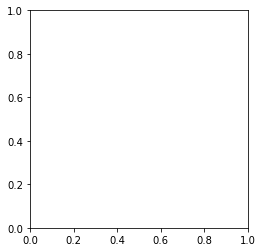

In [58]:
plt.imshow(merged8bitNormalized)

In [40]:
np.unique(markers)

array([   0,    1,    2, ..., 1514, 1515, 1516], dtype=int32)

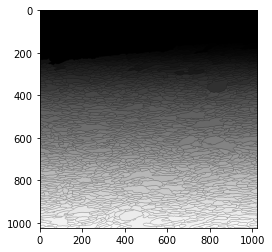

In [42]:
plt.imshow(markers, cmap="gray")

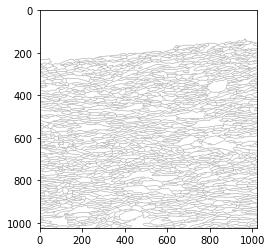

In [38]:
plt.imshow(markers, cmap="gray")

In [15]:
imgCopy.shape

(1024, 1024)

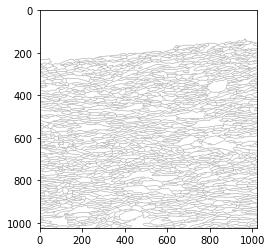

In [32]:
plt.imshow(imgCopy, cmap="gray")

In [11]:
len(np.where(imgCopy==255)[0])

83310

In [28]:
from skimage.morphology import label
labeled_mask = label(imgCopy)
print ('Found ', len(np.unique(labeled_mask)), ' connected masks')
B = []
for i in np.unique(labeled_mask):
    if i == 0: # id = 0 is for background
        continue
    mask_i = (labeled_mask==i).astype(np.uint8)
    B.append(mask_i)
n_blobs = len(B)

Found  4  connected masks


In [38]:
def add_2d_border(image2d):
    insertHere = (slice(1, image2d.shape[0] - 1), slice(1, image2d.shape[1] - 1))
    cells_with_borders = np.zeros_like(image2d)
    cells_with_borders.fill(0)

    cells_with_borders[insertHere] = image2d[insertHere]
    # plt.imshow(cells_with_borders)
    # plt.show()
    # print(insertHere)
    image2d = cells_with_borders

    # print(image2d.shape)
    return image2d

In [39]:
def create_horizontal_gradient(cells):
    cells = add_2d_border(cells)
    horiz_gradient = np.zeros_like(cells)

    for j in range(0, cells.shape[-2], 1):
        counter = 1
        last_id = 0
        for i in range(0, cells.shape[-1], 1):
            # dark stuff or beginning of line creates a beginning of the gradient and a counter
            # then try go back by n pixels when new white/black line is detected

            current_cell_id = cells[j][i]

            if current_cell_id != 0 and current_cell_id != last_id:
                last_id = current_cell_id

            if current_cell_id == 0 and last_id != 0:
                last_id = 0
                # divide counter by 2
                half_counter = int(counter / 2.)
                counter = 1  # restart counter
                # found a new cell edge --> go backwards to create the gradient
                reverse_counter = 1
                for ii in range(0, -half_counter + 1, -1):
                    horiz_gradient[j][i + ii] = reverse_counter
                    reverse_counter += 1

            if current_cell_id != 0 and current_cell_id == last_id:
                horiz_gradient[j][i] = counter
                counter += 1
    return horiz_gradient

In [40]:
def create_vertical_gradient(cells):
    cells = add_2d_border(cells)
    vertical_gradient = np.zeros_like(cells)

    for i in range(0, cells.shape[-1], 1):
        counter = 1
        last_id = 0
        for j in range(0, cells.shape[-2], 1):
            current_cell_id = cells[j][i]

            if current_cell_id != 0 and current_cell_id != last_id:
                last_id = current_cell_id

            if current_cell_id == 0 and last_id != 0:
                last_id = 0
                # divide counter by 2
                half_counter = int(counter / 2.)
                counter = 1  # restart counter
                # found a new cell edge --> go backwards to create the gradient
                reverse_counter = 1
                for jj in range(0, -half_counter + 1, -1):
                    vertical_gradient[j + jj][i] = reverse_counter
                    reverse_counter += 1

            if current_cell_id != 0 and current_cell_id == last_id:
                vertical_gradient[j][i] = counter
                counter += 1
    return vertical_gradient


In [41]:
def get_seeds(cells, one_seed_per_cell=True):
    # TODO really need make sure there is only one seed per cell --> if many then reduce to one by keeping only the biggest --> good idea and may improve things
    # really worth a test...
    horiz_gradient = create_horizontal_gradient(cells)
    vertical_gradient = create_vertical_gradient(cells)

    # plt.imshow(horiz_gradient)
    # plt.show()
    #
    # plt.imshow(vertical_gradient)
    # plt.show()

    combined_gradients_ready_for_wshed, seeds = _get_seeds(cells, horiz_gradient, vertical_gradient)

    # plt.imshow(combined_gradients_ready_for_wshed)
    # plt.show()

    # Img(combined_gradients_ready_for_wshed, dimensions='hw').save('/E/Sample_images/sample_images_epiguy_pyta/images_with_different_bits/predict/gradient.tif')

    # if there are several seeds for a cell then just keep the biggest --> good idea
    # how can I do that --> maybe simply do so by counting ids for stuff and remove smallest
    # count how many seeds are found for each cell

    if one_seed_per_cell:
        new_seeds = label(seeds.astype(np.uint8), connectivity=1, background=0)
        props_seeds = regionprops(new_seeds)

        extra_seeds_to_remove = []

        for region in regionprops(cells):
            # remove small seeds
            cells_found = []
            for coordinates in region.coords:
                cells_found.append(new_seeds[coordinates[0], coordinates[1]])
            cells_found = list(dict.fromkeys(cells_found))
            if 0 in cells_found:
                cells_found.remove(0)
            if len(cells_found) > 1:
                # extra_seeds_to_remove
                # loop over seeds by area and keep only the best/biggest
                # see
                max_area = 0
                for cell in cells_found:
                    region = props_seeds[cell - 1]
                    max_area = max(max_area, region.area)

                for cell in cells_found:
                    if not props_seeds[cell - 1].area == max_area:
                        extra_seeds_to_remove.append(cell)

        for region in props_seeds:
            if region.label in extra_seeds_to_remove:
                for coordinates in region.coords:
                    seeds[coordinates[0], coordinates[1]] = 0  # do remove the seed

    return combined_gradients_ready_for_wshed, seeds

In [43]:
def _get_seeds(cells, horiz_gradient, vertical_gradient):
    # combine gradients
    combined_gradients_ready_for_wshed = horiz_gradient + vertical_gradient

    highest_pixels = np.zeros_like(cells)

    for region in regionprops(cells, intensity_image=combined_gradients_ready_for_wshed):
        max_val = 0

        factor = math.sqrt(
            region.area) * 30 / 100  # try scale seed by cell size --> use area for that # ideally should have jut one seed per cell and scale with size

        for j in range(0, region.intensity_image.shape[-2], 1):
            for i in range(0, region.intensity_image.shape[-1], 1):
                if region.intensity_image[j, i] >= max_val:
                    max_val = region.intensity_image[j, i]

        # region.image[...] = False  # do it better with fill
        region.image.fill(False)

        region.image[region.intensity_image >= (max_val - factor)] = True

        for coordinates in region.coords:
            highest_pixels[coordinates[0], coordinates[1]] = 255
    return combined_gradients_ready_for_wshed, highest_pixels

In [59]:
combined_gradients_ready_for_wshed, seeds = get_seeds(img[:,:,0])

In [58]:
np.unique(result1[1])

array([  0, 255], dtype=uint8)

In [61]:
np.unique(seeds)

array([  0, 255], dtype=uint8)

In [33]:
np.unique(result1)

array([  0, 255], dtype=uint8)

In [52]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

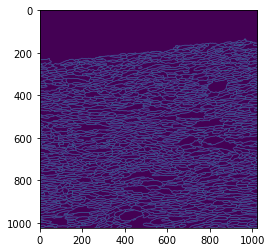

In [53]:
plt.imshow(gray)

In [54]:
np.unique(gray)

array([  0, 255], dtype=uint8)

In [56]:
img2 = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)[1]  # ensure binary
ret, labels = cv2.connectedComponents(img2)

In [57]:
np.unique(labels)

array([0, 1, 2, 3], dtype=int32)

In [26]:
threshold = filters.threshold_otsu(img)

/var/folders/6r/4p5g0w_j4jv11sr24nv1b0140000gn/T/ipykernel_8768/2787910631.py:1: UserWarning: threshold_otsu is expected to work correctly only for grayscale images; image shape (1024, 1024, 3) looks like that of an RGB image.
  threshold = filters.threshold_otsu(img)


In [28]:
labels = measure.label(img)

In [30]:
np.unique(labels)

array([0, 1, 2, 3])

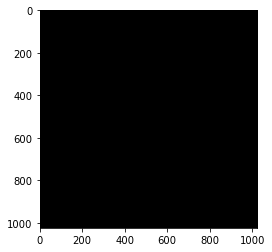

In [9]:
plt.imshow(opening)

In [14]:
imgBin = img[:,:,0]
ret3, markers = cv2.connectedComponents(imgBin)

In [11]:
img.shape

(1024, 1024, 3)

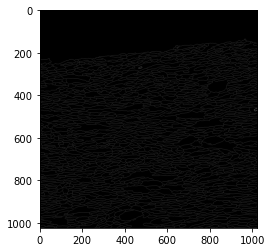

In [20]:
plt.imshow(markers, cmap="gray")

In [64]:
np.unique(markers)

array([0, 1, 2, 3], dtype=int32)

In [70]:
play = np.where(markers == 3, 255, 0)

In [72]:
np.where(markers==3)

(array([460, 460, 461, 461, 461, 462, 463, 463, 464, 464, 464, 464, 464,
        464, 465, 466, 466, 467, 468, 469, 470, 470, 470, 471, 471, 471,
        471, 472, 472, 472, 472, 472, 473, 473, 473, 473, 474, 474, 474]),
 array([1022, 1023, 1019, 1020, 1021, 1018, 1016, 1017, 1010, 1011, 1012,
        1013, 1014, 1015, 1009, 1007, 1008, 1006, 1006, 1005, 1006, 1022,
        1023, 1007, 1019, 1020, 1021, 1007, 1015, 1016, 1017, 1018, 1008,
        1012, 1013, 1014, 1009, 1010, 1011]))

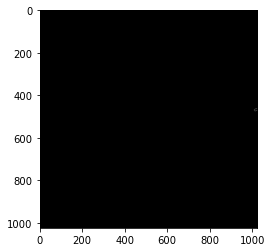

In [71]:
plt.imshow(play, cmap="gray")